# codigo de visualizacion

In [ ]:
!pip install pydicom
 # El _! pip install_ funciona para instalar librerias ,
# al correr el codigo suelta error por que en mi entorno no se encuentra instalado
# pydicom , lo instalamos y la siguiente celda deberia correr correctamente. =)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Cambia a la carpeta deseada en Google Drive
PATH = '//content/drive/MyDrive/practica3_data'
print(os.listdir(PATH))


['full_archive.npz', 'overview.csv', 'tiff_images', 'dicom_dir']


In [ ]:
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [ ]:
print("Número de archivos DICOM:", len(os.listdir(os.path.join(PATH, "dicom_dir")))) # Use os.path.join to build the correct path

Número de archivos DICOM: 100


In [ ]:
import os
import pandas as pd
from glob import glob

def process_data(path):
    # Use os.path.join to ensure correct path construction
    filepaths = glob(os.path.join(PATH, path))

    # Check if any files were found
    if not filepaths:
        print(f"No files found matching pattern: {os.path.join(PATH, path)}")
        return pd.DataFrame()  # Return an empty DataFrame if no files found

    data = pd.DataFrame([{'path': filepath} for filepath in filepaths])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [ ]:
dicom_data = process_data('dicom_dir/*.dcm')

In [ ]:
dicom_data.head(34)

,path,file,ID,Age,Contrast,Modality
0,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,0000,60,True,CT
1,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0024_AGE_0060_CONTRAST_1_CT.dcm,0024,60,True,CT
2,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0023_AGE_0061_CONTRAST_1_CT.dcm,0023,61,True,CT
3,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0022_AGE_0074_CONTRAST_1_CT.dcm,0022,74,True,CT
4,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0013_AGE_0060_CONTRAST_1_CT.dcm,0013,60,True,CT
5,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0005_AGE_0048_CONTRAST_1_CT.dcm,0005,48,True,CT
6,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,0001,69,True,CT
7,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0025_AGE_0074_CONTRAST_1_CT.dcm,0025,74,True,CT
8,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0020_AGE_0066_CONTRAST_1_CT.dcm,0020,66,True,CT
9,//content/drive/MyDrive/practica3_data/dicom_d...,ID_0014_AGE_0071_CONTRAST_1_CT.dcm,0014,71,True,CT


In [ ]:
# Mostrar imágenes
def show_images(data, dim=20, imtype='DICOM'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(10,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='DICOM'):
            data_row_img = dicom.dcmread(data_row['path'])
        if(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

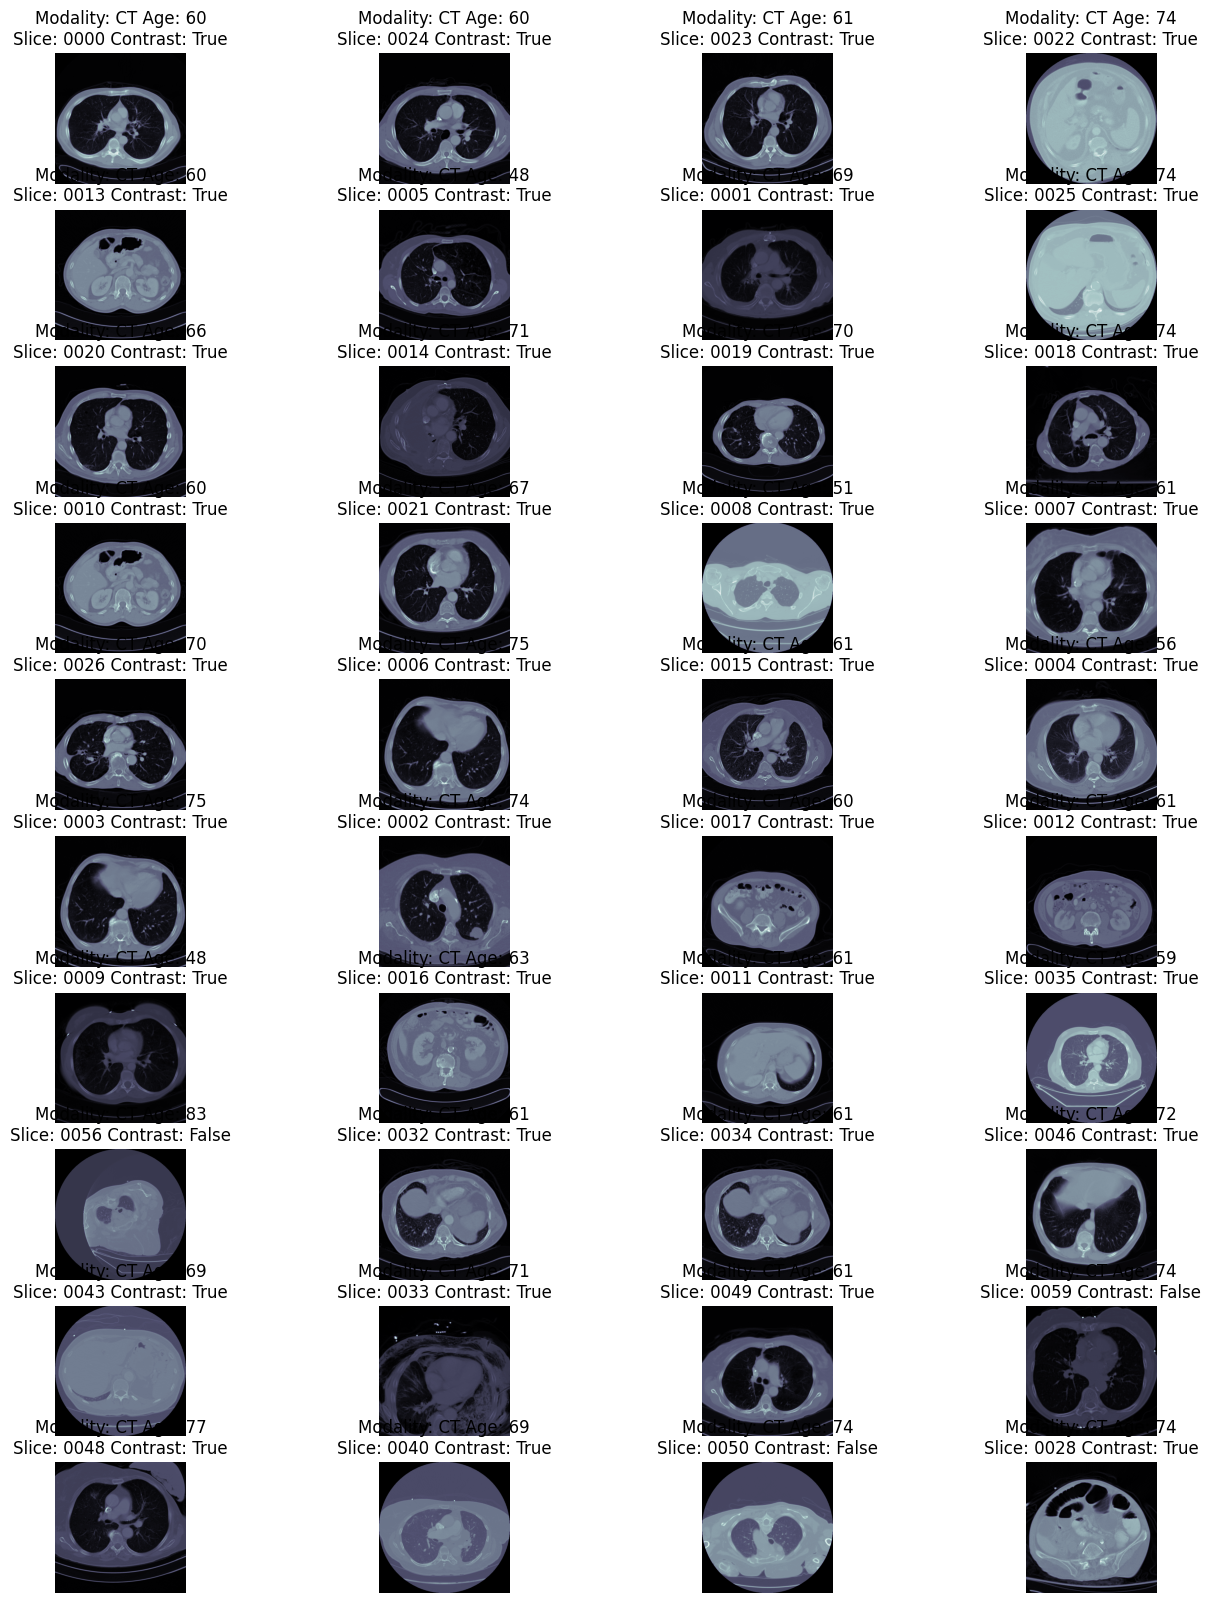

In [ ]:
show_images(dicom_data,40,'DICOM')

In [ ]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.dcmread(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

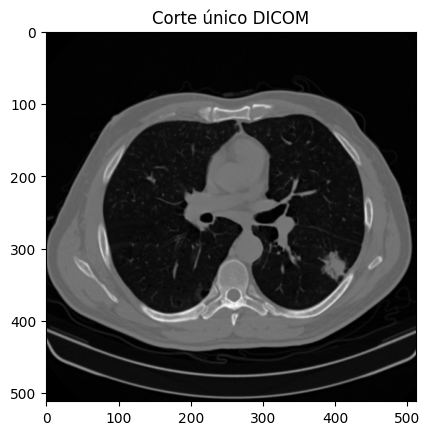

In [ ]:
import pydicom
import matplotlib.pyplot as plt # Add this import for plotting

# Función para mostrar todos los cortes de un archivo DICOM
def mostrar_cortes_dicom(ruta_dicom):
    # Leer el archivo DICOM
    ds = pydicom.dcmread(ruta_dicom)

    # Verificar si contiene datos de imagen
    if hasattr(ds, 'pixel_array'):
        imagen = ds.pixel_array

        # Si es una imagen 2D (un solo corte), mostramos directamente
        if len(imagen.shape) == 2:
            plt.imshow(imagen, cmap='gray')
            plt.title('Corte único DICOM')
            plt.show()
        # Si es una imagen 3D (múltiples cortes), mostramos uno por uno
        elif len(imagen.shape) == 3:
            num_slices = imagen.shape[3]

            # Mostrar todos los cortes uno por uno
            for i in range(num_slices):
                plt.imshow(imagen[i], cmap='gray')
                plt.title(f'Corte {i+1}/{num_slices}')
                plt.show()
    else:
        print("El archivo DICOM no contiene datos de imagen.")

# Ruta del archivo DICOM (sube el archivo o vincula tu Google Drive)
# Si lo subiste directamente a Colab, puedes usar '/content/nombre_del_archivo.dcm'
ruta_dicom = '//content/drive/MyDrive/practica3_data/dicom_dir/ID_0098_AGE_0061_CONTRAST_0_CT.dcm'

# Mostrar todos los cortes del archivo DICOM
mostrar_cortes_dicom(ruta_dicom)